# TF-IDF, Logistic Regression, Naive Bayes
Data Modeling step :
1. Load dataset_clean.csv
2. Encode label (positif, negatif, netral)
3. Split train/test (80/20)
4. Vectorize clean_tweet dengan TF-IDF
5. Train dua model:
    - Logistic Regression
    - Multinomial Naive Bayes
    - Evaluate (Accuracy, F1-score, Confusion Matrix)
    - Save model + vectorizer .pkl

In [261]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
# Laod data cleaned
#df = pd.read_csv("../data/tweet_bersih_normalizer.csv")
df = pd.read_csv("../data/dataset_clean.csv")
print("=== DATASET INFO ===")
print(df.shape)
print(df.head(3))

=== DATASET INFO ===
(1815, 3)
  sentimen                                              tweet  \
0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....   

                                         clean_tweet  
0  kata indonesia dihargai bangsa asing berita pa...  
1  batuan langka tasbih jokowi hadiah habib luthf...  
2  era jokowi ekonomi indonesia semakin baik pic ...  


In [263]:
#Encoding Label dan Split Data
# print distribusi sentimen
print("\nDistribusi Label : ")
print(df['sentimen'].value_counts())

# split data
x = df['clean_tweet']
#x = df['tweet_bersih']
y = df['sentimen']


X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


print(f"\nUkuran data train: {X_train.shape[0]}, test: {X_test.shape[0]}")


Distribusi Label : 
sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

Ukuran data train: 1452, test: 363


In [ ]:
# TF-IDF Vercorization
tfidf = TfidfVectorizer(
    max_features=200, # ngambil 5000 kata terpenting
    ngram_range=(1,2), # unigram + bigram
    min_df=3, # kata muncul minimal 3 kali aje
    max_df=0.85,# katamuncul di <90% dokumen
    stop_words=None
    
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shape:", X_train_tfidf.shape)



TF-IDF matrix shape: (1452, 100)


In [265]:
# TRAIN LOGISTIC REGRESSION ===
logreg = LogisticRegression(max_iter=1000,C=0.3,random_state=42)
logreg.fit(X_train_tfidf, y_train)

y_pred_lr = logreg.predict(X_test_tfidf)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

Logistic Regression Accuracy: 0.5152


In [266]:
# === 7. TRAIN MULTINOMIAL NAIVE BAYES ===
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")

Naive Bayes Accuracy: 0.5537


=== Model Accuracy Summary ===
Logistic Regression → train: 0.591, test: 0.515
Naive Bayes         → train: 0.576, test: 0.554

=== Logistic Regression Report ===
              precision    recall  f1-score   support

     negatif       0.52      0.56      0.54       119
      netral       0.55      0.55      0.55       121
     positif       0.47      0.44      0.46       123

    accuracy                           0.52       363
   macro avg       0.51      0.52      0.51       363
weighted avg       0.51      0.52      0.51       363


=== Naive Bayes Report ===
              precision    recall  f1-score   support

     negatif       0.53      0.62      0.57       119
      netral       0.63      0.55      0.59       121
     positif       0.51      0.49      0.50       123

    accuracy                           0.55       363
   macro avg       0.56      0.55      0.55       363
weighted avg       0.56      0.55      0.55       363



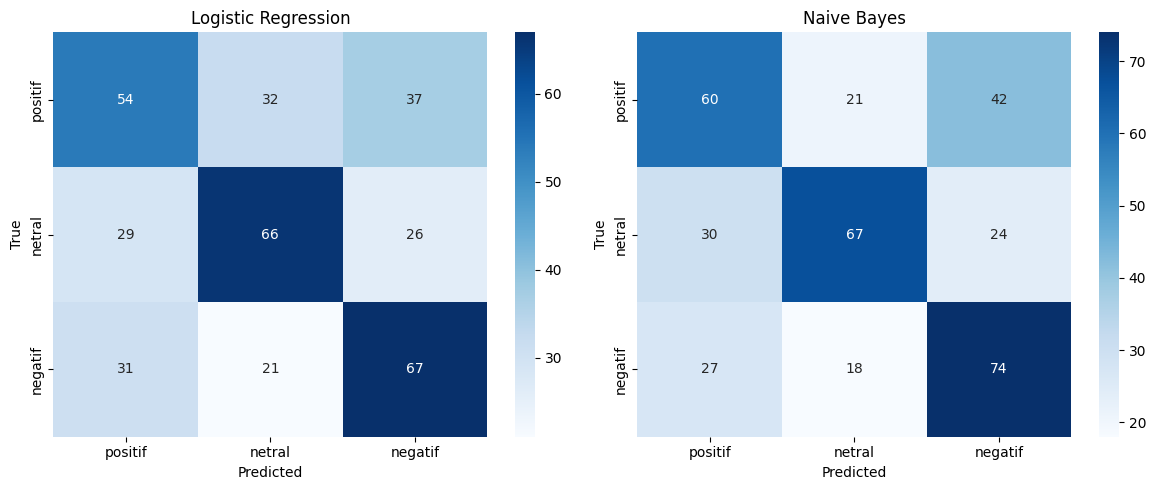

/var/folders/44/d80dskyn3358rs310_pzxf940000gn/T/ipykernel_2485/4243872578.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


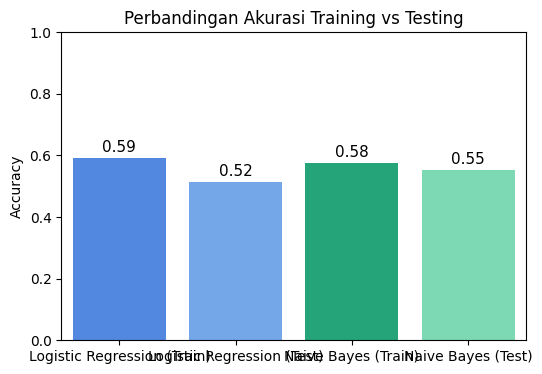

In [267]:
# === 8️⃣ TRAINING & TESTING SCORE (cek overfitting) ===
train_score_lr = logreg.score(X_train_tfidf, y_train)
test_score_lr = logreg.score(X_test_tfidf, y_test)

train_score_nb = nb.score(X_train_tfidf, y_train)
test_score_nb = nb.score(X_test_tfidf, y_test)

print("=== Model Accuracy Summary ===")
print(f"Logistic Regression → train: {train_score_lr:.3f}, test: {test_score_lr:.3f}")
print(f"Naive Bayes         → train: {train_score_nb:.3f}, test: {test_score_nb:.3f}")

# === 9️⃣ EVALUASI DETAIL (TEST SET) ===
print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== Naive Bayes Report ===")
print(classification_report(y_test, y_pred_nb))

# === 🔟 CONFUSION MATRIX VISUAL ===
fig, axes = plt.subplots(1, 2, figsize=(12,5))

for ax, preds, title in zip(
    axes, [y_pred_lr, y_pred_nb], ["Logistic Regression", "Naive Bayes"]
):
    cm = confusion_matrix(y_test, preds, labels=["positif", "netral", "negatif"])
    sns.heatmap(
        cm,
        annot=True, fmt='d', cmap='Blues',
        xticklabels=["positif", "netral", "negatif"],
        yticklabels=["positif", "netral", "negatif"],
        ax=ax
    )
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

plt.tight_layout()
plt.show()

# === 1️⃣1️⃣ VISUAL PERBANDINGAN TRAIN VS TEST ===
plt.figure(figsize=(6,4))
sns.barplot(
    x=["Logistic Regression (Train)", "Logistic Regression (Test)",
       "Naive Bayes (Train)", "Naive Bayes (Test)"],
    y=[train_score_lr, test_score_lr, train_score_nb, test_score_nb],
    palette=["#3b82f6", "#60a5fa", "#10b981", "#6ee7b7"]
)
plt.title("Perbandingan Akurasi Training vs Testing")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate([train_score_lr, test_score_lr, train_score_nb, test_score_nb]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=11)
plt.show()



=== Logistic Regression Report ===
              precision    recall  f1-score   support

     negatif       0.52      0.56      0.54       119
      netral       0.55      0.55      0.55       121
     positif       0.47      0.44      0.46       123

    accuracy                           0.52       363
   macro avg       0.51      0.52      0.51       363
weighted avg       0.51      0.52      0.51       363


=== Naive Bayes Report ===
              precision    recall  f1-score   support

     negatif       0.53      0.62      0.57       119
      netral       0.63      0.55      0.59       121
     positif       0.51      0.49      0.50       123

    accuracy                           0.55       363
   macro avg       0.56      0.55      0.55       363
weighted avg       0.56      0.55      0.55       363



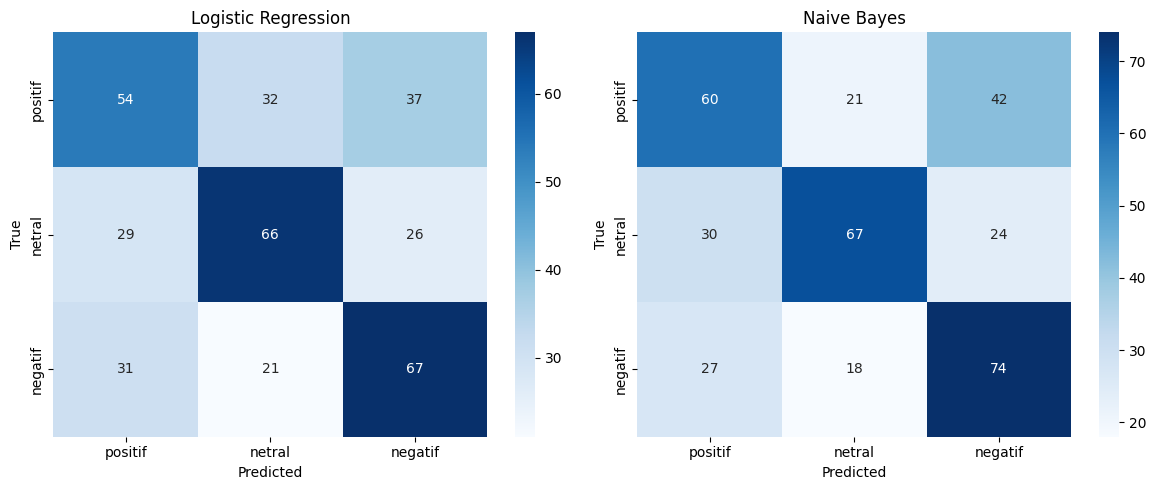

In [268]:
# EVALUASI DETAIL
print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== Naive Bayes Report ===")
print(classification_report(y_test, y_pred_nb))

# === 9. CONFUSION MATRIX ===
fig, axes = plt.subplots(1, 2, figsize=(12,5))

for ax, preds, title in zip(
    axes, [y_pred_lr, y_pred_nb], ["Logistic Regression", "Naive Bayes"]
):
    cm = confusion_matrix(y_test, preds, labels=["positif", "netral", "negatif"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["positif", "netral", "negatif"], yticklabels=["positif", "netral", "negatif"], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [269]:
import os
import pickle

# === 10️⃣ SAVE MODEL ===
model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)  # ✅ create folder kalau belum ada

# Simpan TF-IDF Vectorizer
with open(os.path.join(model_dir, "tfidf_vectorizer.pkl"), "wb") as f:
    pickle.dump(tfidf, f)

# Simpan Logistic Regression
with open(os.path.join(model_dir, "logreg_model.pkl"), "wb") as f:
    pickle.dump(logreg, f)

# Simpan Naive Bayes
with open(os.path.join(model_dir, "naive_bayes_model.pkl"), "wb") as f:
    pickle.dump(nb, f)

print("✅ Models & vectorizer saved successfully at:", os.path.abspath(model_dir))


✅ Models & vectorizer saved successfully at: /Users/fatihg/dev/AI-ForIndonesia/sentiment_analysts/models


✅ Models loaded successfully


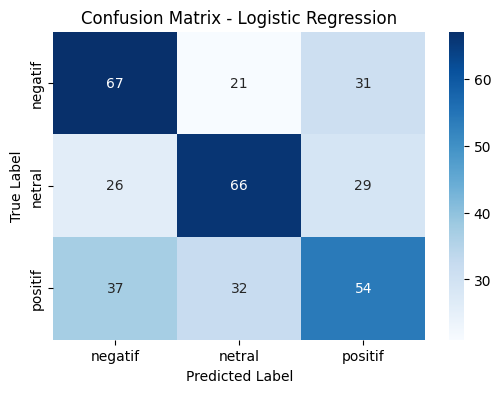

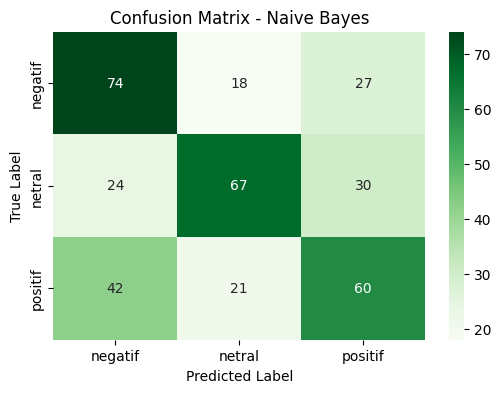

/var/folders/44/d80dskyn3358rs310_pzxf940000gn/T/ipykernel_2485/1662192590.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Logistic Regression", "Naive Bayes"],


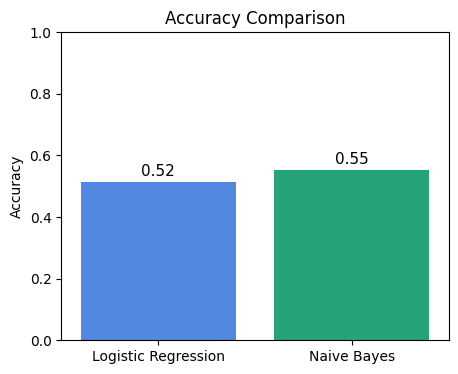

✅ Accuracy LogReg: 0.52
✅ Accuracy Naive Bayes: 0.55


In [270]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# === 1️⃣ LOAD MODEL & DATA SPLIT ===
model_dir = "../models"

# Pastikan model sudah ada
assert os.path.exists(os.path.join(model_dir, "logreg_model.pkl")), "❌ Logistic Regression model not found!"
assert os.path.exists(os.path.join(model_dir, "naive_bayes_model.pkl")), "❌ Naive Bayes model not found!"
assert os.path.exists(os.path.join(model_dir, "tfidf_vectorizer.pkl")), "❌ TF-IDF vectorizer not found!"

# Load model & vectorizer
with open(os.path.join(model_dir, "tfidf_vectorizer.pkl"), "rb") as f:
    tfidf = pickle.load(f)
with open(os.path.join(model_dir, "logreg_model.pkl"), "rb") as f:
    logreg = pickle.load(f)
with open(os.path.join(model_dir, "naive_bayes_model.pkl"), "rb") as f:
    nb = pickle.load(f)

print("✅ Models loaded successfully")

# Kalau X_test & y_test belum ada, buat ulang dari dataset
if "X_test" not in locals() or "y_test" not in locals():
    import pandas as pd
    from sklearn.model_selection import train_test_split

    df = pd.read_csv("../data/dataset_clean.csv")
    X = df["clean_tweet"]
    y = df["sentimen"]
    X_tfidf = tfidf.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
    print("✅ Data test rebuilt")

# === 2️⃣ PREDIKSI MODEL ===
# Transform text test data ke TF-IDF vector
X_test_tfidf = tfidf.transform(X_test)

y_pred_logreg = logreg.predict(X_test_tfidf)
y_pred_nb = nb.predict(X_test_tfidf)

# === 3️⃣ CONFUSION MATRIX VISUAL ===
def plot_confusion(model_name, y_true, y_pred, cmap):
    cm = confusion_matrix(y_true, y_pred, labels=sorted(list(set(y_true))))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
                xticklabels=sorted(list(set(y_true))),
                yticklabels=sorted(list(set(y_true))))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion("Logistic Regression", y_test, y_pred_logreg, "Blues")
plot_confusion("Naive Bayes", y_test, y_pred_nb, "Greens")

# === 4️⃣ ACCURACY COMPARISON ===
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_nb = accuracy_score(y_test, y_pred_nb)

plt.figure(figsize=(5, 4))
sns.barplot(x=["Logistic Regression", "Naive Bayes"],
            y=[acc_logreg, acc_nb],
            palette=["#3b82f6", "#10b981"])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate([acc_logreg, acc_nb]):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=11)
plt.show()

print(f"✅ Accuracy LogReg: {acc_logreg:.2f}")
print(f"✅ Accuracy Naive Bayes: {acc_nb:.2f}")
